# Objective: 

Come up with customer profile of the diffent products.
Perform uni-variate and multi-variate analysis.
Give recommendations on how Cardio Good Fitness can target new customers. 


# Key questions to be answered:

* What is the diffrences between customers of each product?
* What is the relationships between the different sttributes of customers?


# Dataset:

* Product - the model no. of the treadmill
* Age - in no of years, of the customer
* Gender - of the customer
* Education - in no. of years, of the customer
* Marital Status - of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - of the customer
* Miles- expected to run

### Import the necessary packages pandas, numpy, seaborn and metaplotlib.pyplot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline

### Read in the dataset

In [3]:
cardioF=pd.read_csv('CardioGoodFitness.csv')

In [4]:
cardioF.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


**Observations:** Data set is as per the description provided. 

In [6]:
cardioF.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

**Observations:** Data Tyoe of Product, Gender and MarialStatus is "Object" because the data is "non-numeric"

In [10]:
cardioF.shape

(180, 9)

**Observations:** There are 180 rows and 9 columns

In [17]:
print("Product: " ,cardioF.Product.nunique())
print("Gender: " ,cardioF.Gender.nunique())
print("MaritalStatus: " ,cardioF.MaritalStatus.nunique())

Product:  3
Gender:  2
MaritalStatus:  2


**Observations:** Cardio Good Fitness data is usage of their 3 products by gender and their maritalstatuses.

### Analysis of the quantitative variables in the dataset

In [18]:
cardioF.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Observations:**
    1. Age is spread over huge range 18 to 50
    2. The mean of Age,Usage and Miles are close to 75% prtcentile. This means it is postive skewed or right skewed

### Lets see the distribution to confirm our observation of data

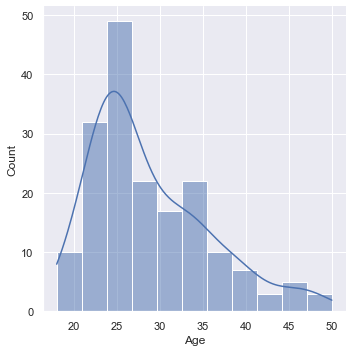

In [48]:
sns.displot(x=cardioF['Age'],kde=True);

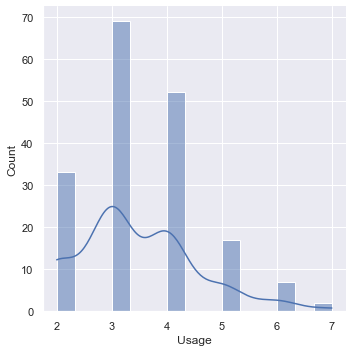

In [49]:
sns.displot(x=cardioF['Usage'],kde=True);

C:\Users\alkas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\alkas\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


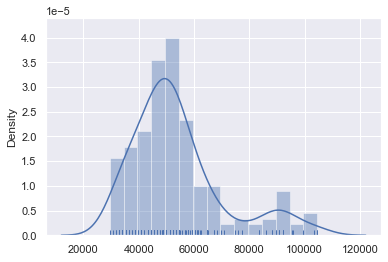

In [174]:
sns.distplot(x=cardioF['Income'],kde=True,rug=True);


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

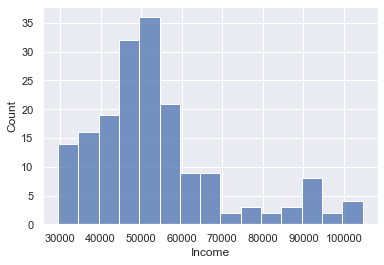

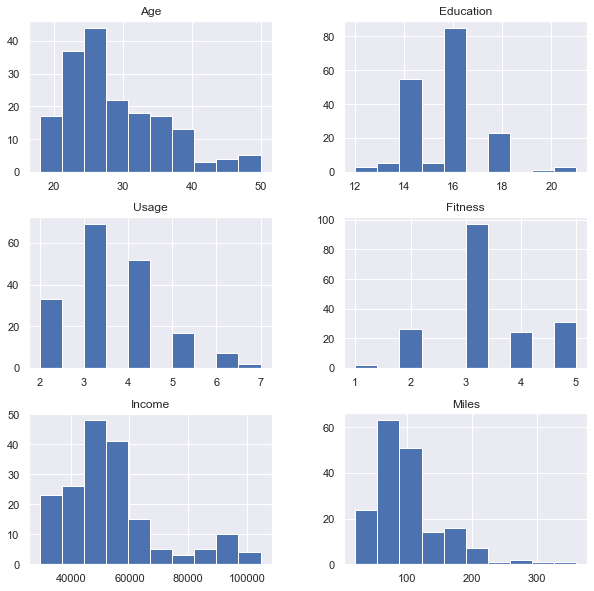

In [177]:
sns.histplot(cardioF['Income'],kde=False);
cardioF.hist(figsize=(10,10))

### Lets check the relationship between various numerical data points

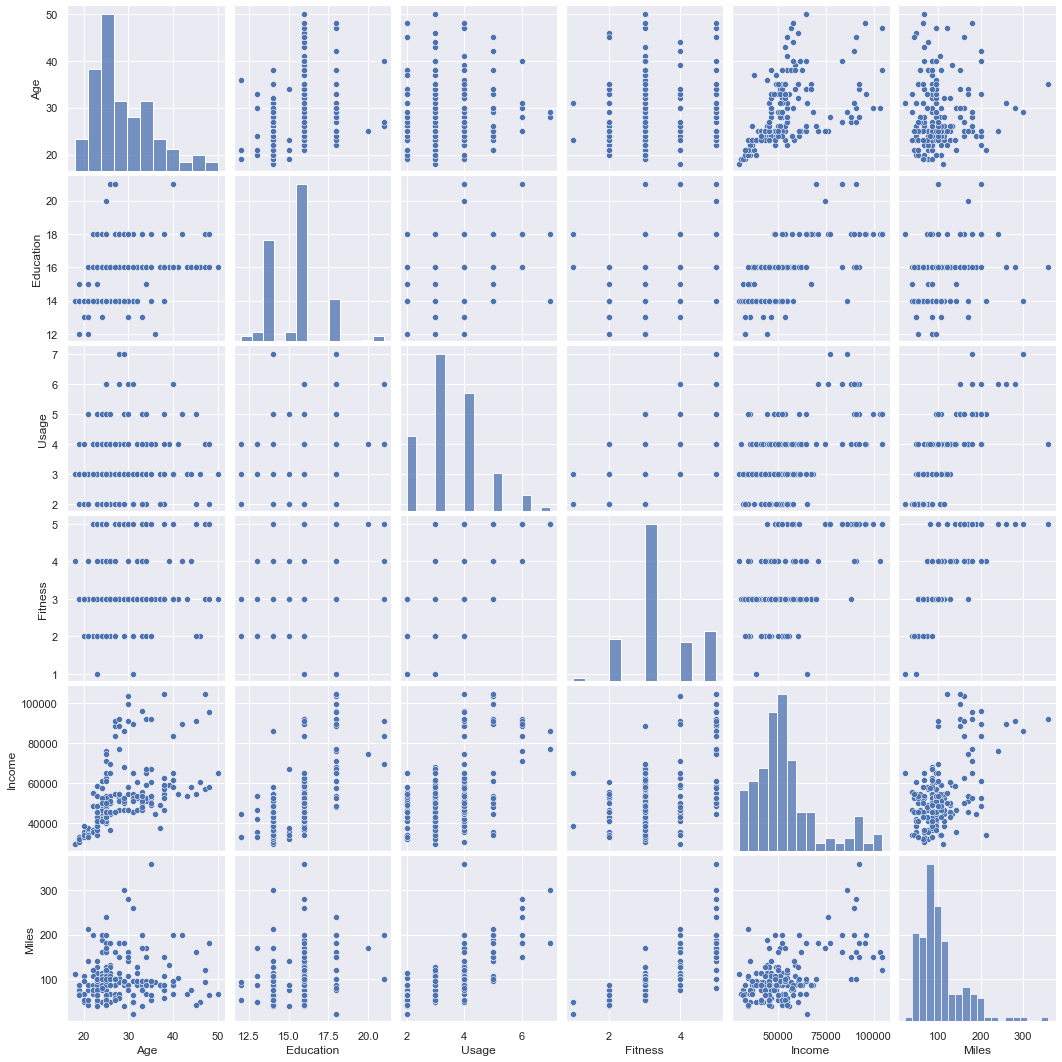

In [57]:
sns.pairplot(cardioF);

In [54]:
cardioF.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

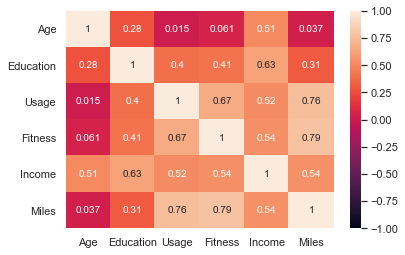

In [61]:
sns.heatmap(cardioF.corr(),annot=True,vmin=-1, vmax=1)

**Observations:**
1. As expected Fitness increases as Usage goes up. These varaibles can be ignored for analysis as these are more for Information.
2. Similarly as more the Usage, more the miles ran. These varaibles also can be ignored for analysis as these are more for Information. 
3. There is hardly any relation beteween Usage and Age of the customer, so it does not show that a particular age are using more tha others, so may be can be ignored for analysis.
4. It is obvious that as Age increases, Income also increases. Again, these varaibles can be ignored for analysis as these are more for Information.
5. Similarly there is hardly any correlation between Age and Fitness, hence can be ignored from analysis.
7. More analysis is required to find what influences the Usage. Is it affordability of product (income) or Gender or Marital Status.

### Lets first check what product used more by customers

C:\Users\alkas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product', ylabel='Usage'>

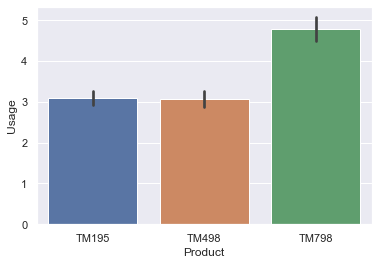

In [140]:
sns.barplot(cardioF['Product'],cardioF['Usage'])

**Observations:** TM798 is more popular and used more realtive to other two products.

### Lets find if the high usage is directly linked to number of customers 

C:\Users\alkas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


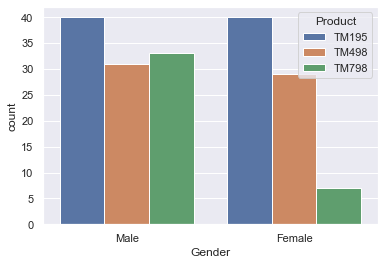

In [163]:
sns.countplot(cardioF['Gender'],hue=cardioF['Product']);

C:\Users\alkas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


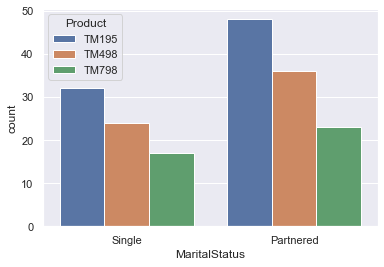

In [164]:
sns.countplot(cardioF['MaritalStatus'],hue=cardioF['Product']);

**Observations:**
1. More number of customers owns TM195 and TM498 products than TM798

**Based on the observation it is clear that although less number of customers owns TM798, it is used more than other two products. Even the marital  status does not impact the usage**

### Lets see if there is any relationship between product and affordability of the product

C:\Users\alkas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


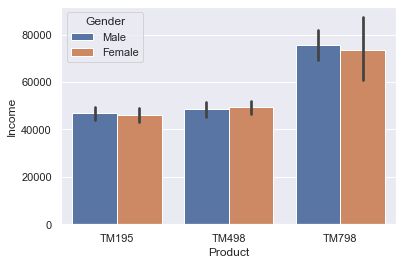

In [157]:
sns.barplot(cardioF['Product'],cardioF['Income'],hue=cardioF['Gender']);

C:\Users\alkas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


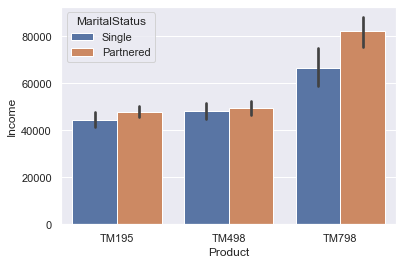

In [166]:
sns.barplot(cardioF['Product'],cardioF['Income'],hue=cardioF['MaritalStatus']);

**Observations:** It looks like TM798 is owned by customers  having higher income, which leads to the assumption that it is more expensive than other two products.

## Conclusions

1. TM798 is used more than other two products - TM195 and TM498
2. Price of TM798 could be higher than other two products - TM195 and TM498
3. Even though the number of customers owning TM798 is lowest. it is used by the customers is highest. This could be because TM798 has better features than other two and hence customers are enjoyig the product more and would like to use it more.
4. TM195 and TM498 are less expensive and more affordable, but may be do not offer great fatures. This could be reason for limited usage of the products.
5. TM798 is more popular in males than females.

## Recommedations

1. Add features to TM798 that could attarct female populations to increase sale of product TM798.
2. Make TM798 affordable to mid range income customers by reducig the price of TM798 which will boos the sale of product.
3. Add few more features to TM195 and TM498 that will improve the adoption and usage, which could increase the sale of these products in low to mid range income customers.
